# Subreddit Classifier

## Business Problem
---

Going through Reddit posts can be addictive especially when interesting stories and posts comes in a row. However, wrongly classified posts from other subreddit can be such a web blanket when we are in the mood to continue reading. On top of which, when the number of wrongly classifed posts grow, it might just turn readers away. Therefore, it is important to tag our posts correctly for better reader experience. Therefore, building a model to suggest the correct label to writers will improve the chances of labeling posts correctly which will not only improve reader experience but also increase the browse rate of the posts which will indirectly motivate writers to post more often. The two chosen Subreddit for this analysis are Unresolved Mysteries and Cold Cases. The outcome success will be evaluated based on accuracy and the sensitivity of our model in classifying these two Subredits. 

## Flow of This Analysis
---

Around 600 posts are scraped from each subreddit for this analysis. Features included are title, textbody and subreddit labels. This analysis will start with text cleaning using regular expression and different tokenization methods, followed by building the correct model to best predict subreddit labels. Lastly, we will take a look at our model performance by evaluating confusion matrix and various scores of our models. As an result, we decide our best model to be used in future subreddit classification. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Problem</a></span></li><li><span><a href="#Flow-of-This-Analysis" data-toc-modified-id="Flow-of-This-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Flow of This Analysis</a></span></li><li><span><a href="#Exploring-Dataset" data-toc-modified-id="Exploring-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring Dataset</a></span><ul class="toc-item"><li><span><a href="#Dataset-Information" data-toc-modified-id="Dataset-Information-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dataset Information</a></span></li><li><span><a href="#WordCloud" data-toc-modified-id="WordCloud-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>WordCloud</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-Outliers" data-toc-modified-id="Dealing-with-Outliers-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dealing with Outliers</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Preprocessing</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#CountVectorizer-and-Lemmatization" data-toc-modified-id="CountVectorizer-and-Lemmatization-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>CountVectorizer and Lemmatization</a></span></li><li><span><a href="#CountVectorizer-and-Stemming" data-toc-modified-id="CountVectorizer-and-Stemming-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>CountVectorizer and Stemming</a></span></li><li><span><a href="#TfidfVectorizer-and-Stemming" data-toc-modified-id="TfidfVectorizer-and-Stemming-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>TfidfVectorizer and Stemming</a></span></li><li><span><a href="#Key-Words-Predicting-Target-Variable" data-toc-modified-id="Key-Words-Predicting-Target-Variable-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Key Words Predicting Target Variable</a></span></li></ul></li><li><span><a href="#Naive-Bayes-Model" data-toc-modified-id="Naive-Bayes-Model-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Naive Bayes Model</a></span><ul class="toc-item"><li><span><a href="#Countervectorizer" data-toc-modified-id="Countervectorizer-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Countervectorizer</a></span></li><li><span><a href="#TFIDF" data-toc-modified-id="TFIDF-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>TFIDF</a></span></li><li><span><a href="#Top-Differentiating-Words-for-Two-Subreddits" data-toc-modified-id="Top-Differentiating-Words-for-Two-Subreddits-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Top Differentiating Words for Two Subreddits</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Top-Differentiating-Words-for-Two-Subreddits" data-toc-modified-id="Top-Differentiating-Words-for-Two-Subreddits-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Top Differentiating Words for Two Subreddits</a></span></li></ul></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Naive Bayes</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Mis-Classification-Analysis" data-toc-modified-id="Mis-Classification-Analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Mis-Classification Analysis</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Exploring Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import regex as re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, plot_roc_curve, accuracy_score

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.set_option('max_colwidth', 1000)

### Dataset Information

In [2]:
all_posts2 = pd.read_csv('../Data/all_posts2')

In [3]:
all_posts2.shape

(1274, 103)

In [4]:
all_posts2['subreddit'].value_counts()

UnresolvedMysteries    650
coldcases              624
Name: subreddit, dtype: int64

We have a relatively balanced dataset here with `624 entries from cold cases` subreddit and `650 entries from unresolved mysteries` subreddit. 

### WordCloud

Titles are good summarization of post body. To give us a better sense of what are the most frequent words from titles of each subreddit, we shall visualize it using WordCloud. 

In [5]:
mystery_titles = all_posts2[all_posts2['subreddit']=='UnresolvedMysteries']['title']
coldcases_titles = all_posts2[all_posts2['subreddit']=='coldcases']['title']

Define a function to clean our text string.

In [6]:
def text_processing(list_of_list):
    cleaned_token = ''
    
    tokenizer = RegexpTokenizer(r'\w+')
    stops = list(set(stopwords.words('english')))
   
    for i in list_of_list:
        tokens = tokenizer.tokenize(i.lower())        
        tokens = [token for token in tokens if token not in stops]
        lemmatizer = WordNetLemmatizer()
        text_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        text_tokens = ' '.join(text_tokens)
        cleaned_token = cleaned_token + text_tokens

    return cleaned_token

In [7]:
mystery_words = text_processing(mystery_titles)
coldcase_words = text_processing(coldcases_titles)

Define a function to plot our wordcloud

In [8]:
def plot_cloud(doc_path, words, name):
    char_mask = np.array(Image.open(doc_path))
    image_colors = ImageColorGenerator(char_mask)
    wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', 
                          collocations=False, stopwords = STOPWORDS, mask=char_mask).generate(words)
    plt.figure(figsize=(15, 10)) # Set figure size    
    plt.imshow(wordcloud) # Display image    
    plt.axis("off"); # No axis details
    plt.title(f'Key Words from Subreddit - {name}', fontsize=20)

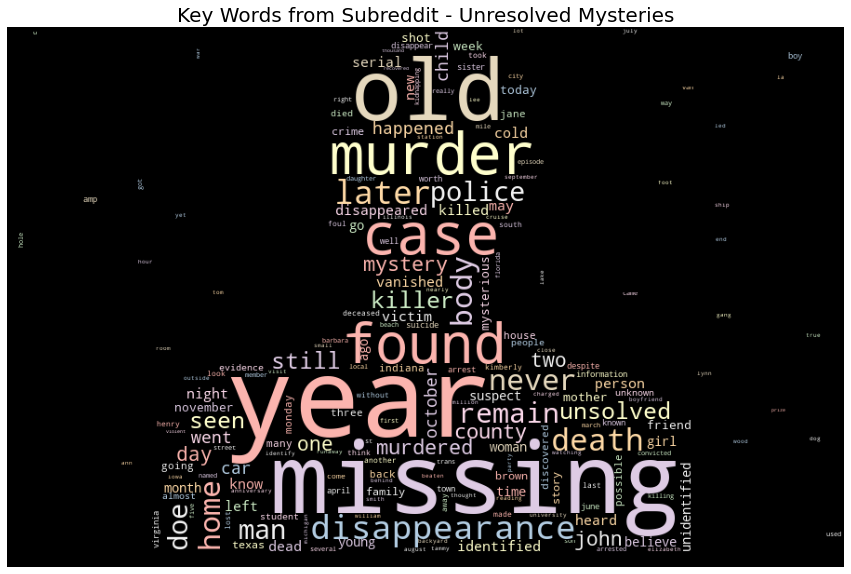

In [9]:
plot_cloud("../image/anonymous.jpg", mystery_words, 'Unresolved Mysteries')

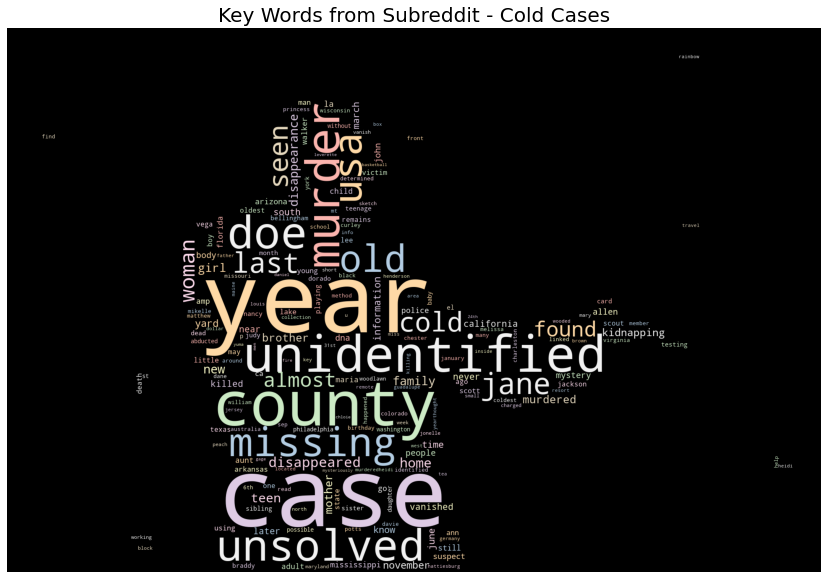

In [10]:
plot_cloud("../image/killer.png", coldcase_words, 'Cold Cases')

In [11]:
print(f"Unresolved Mysteries has {all_posts2[all_posts2['subreddit']=='UnresolvedMysteries']['subreddit_subscribers'][0]} subscribers")
print(f"           Cold Case has {all_posts2[all_posts2['subreddit']=='coldcases']['subreddit_subscribers'][1269]}    subscribers")

Unresolved Mysteries has 1194062 subscribers
           Cold Case has 9483    subscribers


`Unresolved Mysteries` appeared to be a `more popular` subreddit despite the fact that it was created in 2013 and Cold Cases subreddit was created in 2012. Readers appeared to be more interested in mysteries than cold cases which matches our expectation of these two subreddits. 

A check on the frequency of word occurrence in subreddit titles, we can see that two subreddits have `similar sets of key words` in their respective titles such as missing, year, unsolved, murder and disappearance. We shall examine the performance of our model in classifying these two subreddits in the later section. . Quick ensemble of content from the keywords give us the following:
- Unsolved mysteries are mostly about murder cases, missing or disappearance of people who never come home. 
- Cold cases are usually murder or missing people cases which happens in USA and some of the victims or missing people are named Jane. This makes sense because Reddit is an American website and Jane is a common English name.

## Data Cleaning

### Dealing with Outliers

In [12]:
all_posts2['subreddit'].value_counts(normalize=True)

UnresolvedMysteries    0.510204
coldcases              0.489796
Name: subreddit, dtype: float64

In [13]:
all_posts2[['title', 'selftext', 'subreddit']].isnull().sum()

title        0
selftext     0
subreddit    0
dtype: int64

In [14]:
all_posts2 = all_posts2[['title', 'selftext', 'subreddit']]

In [15]:
all_posts2.head(2)

,title,selftext,subreddit
0,A mother took his son to a psychiatric hospital after a bad epilepsy episode and never saw him again. What happened to Luis Eduardo Guachala?,"This is my first post here and english is not my first language so sorry if there are any mistakes. And, yes there is a typo in the title:(\n\nLuis Eduardo Guachala (23) was admitted to the Julio Endara Hospital, a psychiatric institution in Quito, Ecuador on January 10th 2004 after a series of bad epileptic seizures. His mother, Zoila was really worried because he seemed out of it and was talking incoherently. After he arrived to the hospital, she recalls the nurses putting him on a bed and sedating him. The doctor who was in charge that night told her to come back on monday because according to him; ""Luis was going to sleep through the whole weekend""\n\nSo, she gave him her blessing, a kiss on the cheek and told him she was going to come see him later.\n\nZoila came back on the 12th to see Luis but when she went to his room it was empty. She asked the nurses where her son was and they told her he was probably in the barber shop or in group therapy with other patients. Then, a nur...",UnresolvedMysteries
1,10th anniversary of the disappearance of the Skelton Brothers - Morenci Michigan,"\n\nRead previous reddit write ups [here](https://www.reddit.com/r/UnresolvedMysteries/comments/9z50pq/perfect_for_thanksgiving_skeleton_brothers/) and [here](https://www.reddit.com/r/UnresolvedMysteries/comments/7cy521/3_michigan_brothers_still_missing_nearly_7_years/)\n\n[News story](https://www.clickondetroit.com/news/local/2020/11/25/new-age-progression-images-of-missing-skelton-brothers-released-10-years-after-disappearance/) with age progression photos\n\n**Summary -** \n\nNine-year-old Andrew, 7 year old Alexander and 5 year old Tanner Skelton are the sons of Tanya and John Skelton. In 2010 the Skelton’s were in the middle of a contentious divorce. Tanya had full custody of the boys her soon to be ex-husband John had visitation. John wasn’t happy about this arrangement and weeks earlier he’d used his visitation to try and kidnap the boys, driving them south to Florida. When pressed by police he brought the boys back and returned them to their mother as legally required, but...",UnresolvedMysteries


In [16]:
all_posts2['text_length'] = all_posts2['selftext'].apply(lambda x: len(x))

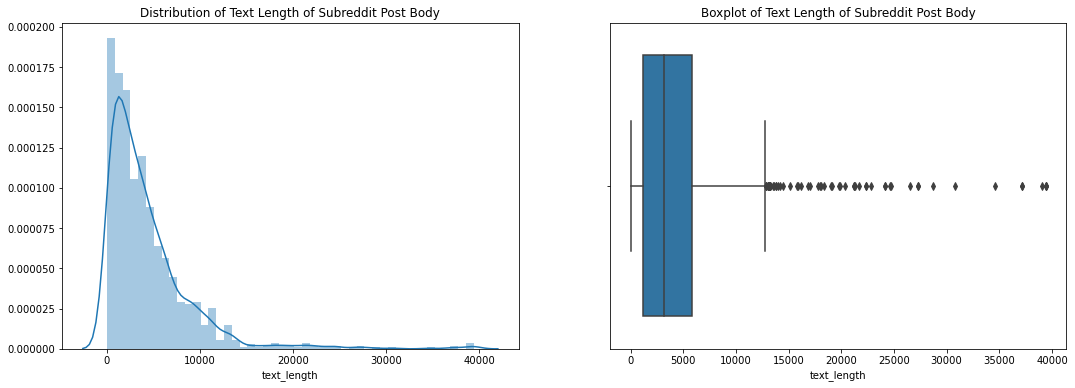

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.distplot(all_posts2['text_length'], ax=ax[0]);
sns.boxplot(all_posts2['text_length'], ax=ax[1])
ax[0].set_title('Distribution of Text Length of Subreddit Post Body')
ax[1].set_title('Boxplot of Text Length of Subreddit Post Body')
plt.show()

In [18]:
all_posts2[all_posts2['text_length']>15000]['title'].count()

38

Notice from the distribution plot and boxplot that there are a lot of posts with super long text body. These are the posts which writers posts narrative stories, in such posts there might be repetitive words. This will unecessarily increase number of occurrence of our features after vectorization. 38 observations on accounts for 3% of our data, therefore, we will drop them from our dataset. 

In [19]:
all_posts2 = all_posts2[all_posts2['text_length']<15000]

In [20]:
all_posts2['subreddit'].value_counts(normalize=True)

coldcases              0.502427
UnresolvedMysteries    0.497573
Name: subreddit, dtype: float64

Notice that after dropping the outliers, our dataset is almost balanced. The baseline model in this case will be a model predicting coldcases only and we will have 50% chance to predict it right. 

### Preprocessing

We will binarize our target variable and combine titles and text body to one text feature.

In [21]:
all_posts2['subreddit'] = all_posts2['subreddit'].map({'UnresolvedMysteries':1, 'coldcases':0})

In [22]:
all_posts2['text_feature'] = all_posts2['title'] + ' ' + all_posts2['selftext']

In [23]:
all_posts2.head(2)

,title,selftext,subreddit,text_length,text_feature
0,A mother took his son to a psychiatric hospital after a bad epilepsy episode and never saw him again. What happened to Luis Eduardo Guachala?,"This is my first post here and english is not my first language so sorry if there are any mistakes. And, yes there is a typo in the title:(\n\nLuis Eduardo Guachala (23) was admitted to the Julio Endara Hospital, a psychiatric institution in Quito, Ecuador on January 10th 2004 after a series of bad epileptic seizures. His mother, Zoila was really worried because he seemed out of it and was talking incoherently. After he arrived to the hospital, she recalls the nurses putting him on a bed and sedating him. The doctor who was in charge that night told her to come back on monday because according to him; ""Luis was going to sleep through the whole weekend""\n\nSo, she gave him her blessing, a kiss on the cheek and told him she was going to come see him later.\n\nZoila came back on the 12th to see Luis but when she went to his room it was empty. She asked the nurses where her son was and they told her he was probably in the barber shop or in group therapy with other patients. Then, a nur...",1,5067,"A mother took his son to a psychiatric hospital after a bad epilepsy episode and never saw him again. What happened to Luis Eduardo Guachala? This is my first post here and english is not my first language so sorry if there are any mistakes. And, yes there is a typo in the title:(\n\nLuis Eduardo Guachala (23) was admitted to the Julio Endara Hospital, a psychiatric institution in Quito, Ecuador on January 10th 2004 after a series of bad epileptic seizures. His mother, Zoila was really worried because he seemed out of it and was talking incoherently. After he arrived to the hospital, she recalls the nurses putting him on a bed and sedating him. The doctor who was in charge that night told her to come back on monday because according to him; ""Luis was going to sleep through the whole weekend""\n\nSo, she gave him her blessing, a kiss on the cheek and told him she was going to come see him later.\n\nZoila came back on the 12th to see Luis but when she went to his room it was empty. Sh..."
1,10th anniversary of the disappearance of the Skelton Brothers - Morenci Michigan,"\n\nRead previous reddit write ups [here](https://www.reddit.com/r/UnresolvedMysteries/comments/9z50pq/perfect_for_thanksgiving_skeleton_brothers/) and [here](https://www.reddit.com/r/UnresolvedMysteries/comments/7cy521/3_michigan_brothers_still_missing_nearly_7_years/)\n\n[News story](https://www.clickondetroit.com/news/local/2020/11/25/new-age-progression-images-of-missing-skelton-brothers-released-10-years-after-disappearance/) with age progression photos\n\n**Summary -** \n\nNine-year-old Andrew, 7 year old Alexander and 5 year old Tanner Skelton are the sons of Tanya and John Skelton. In 2010 the Skelton’s were in the middle of a contentious divorce. Tanya had full custody of the boys her soon to be ex-husband John had visitation. John wasn’t happy about this arrangement and weeks earlier he’d used his visitation to try and kidnap the boys, driving them south to Florida. When pressed by police he brought the boys back and returned them to their mother as legally required, but...",1,3537,"10th anniversary of the disappearance of the Skelton Brothers - Morenci Michigan \n\nRead previous reddit write ups [here](https://www.reddit.com/r/UnresolvedMysteries/comments/9z50pq/perfect_for_thanksgiving_skeleton_brothers/) and [here](https://www.reddit.com/r/UnresolvedMysteries/comments/7cy521/3_michigan_brothers_still_missing_nearly_7_years/)\n\n[News story](https://www.clickondetroit.com/news/local/2020/11/25/new-age-progression-images-of-missing-skelton-brothers-released-10-years-after-disappearance/) with age progression photos\n\n**Summary -** \n\nNine-year-old Andrew, 7 year old Alexander and 5 year old Tanner Skelton are the sons of Tanya and John Skelton. In 2010 the Skelton’

Here we will use Regular Expression to clean our text before fitting our text feature to our model. We will define tokenizer function for both lemmatization and stemming and compare their performance in our model later. 

In [24]:
def text_processing_lemma(string):
    # adding key words from subreddit label and top words from title to our stop words
    stops = list(set(stopwords.words('english')))
    stops = stops + ['cold', 'case', 'thread', 'unsolved', 'mystery', 'edit', 'reddit', 'subreddit', 'crime']

    # regular expressions to clean text
    string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:\/[^\s]*)', '', string) # removing http/https
    string = re.sub(r'(\d)|((?<=\d)(st|nd|rd|th)\b)', '', string) # remove \n, numbers, and ordinal numbers
    
    # tokenizing and removing stop words
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string.lower())    
    tokens = [token for token in tokens if token not in stops]
    
    #lemmatizing
    lemmatizer = WordNetLemmatizer()
    text_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text_tokens = ' '.join(text_tokens)
    
    return text_tokens

In [25]:
def text_processing_stemming(string):
    # adding key words from subreddit label and top words from title to our stop words
    stops = list(set(stopwords.words('english')))
    stops = stops + ['cold', 'case', 'thread', 'unsolved', 'mystery', 'edit', 'reddit', 'subreddit', 'crime']

    # regular expressions to clean text
    string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:\/[^\s]*)', '', string) # removing http/https
    string = re.sub(r'(\d)|((?<=\d)(st|nd|rd|th)\b)', '', string) # remove \n, numbers, and ordinal numbers
    
    # tokenizing and removing stop words
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string.lower())
    
    tokens = [token for token in tokens if token not in stops]

    # stemming
    stemmer = PorterStemmer()
    text_tokens = [stemmer.stem(token) for token in tokens]
    text_tokens = ' '.join(text_tokens)
    
    return text_tokens

Clean our text feature to get ready for our model. 

In [26]:
all_posts2['text_feature_lemma'] = all_posts2['text_feature'].apply(lambda x: text_processing_lemma(x))

In [27]:
all_posts2['text_feature_stemming'] = all_posts2['text_feature'].apply(lambda x: text_processing_stemming(x))

## Modelling 

### Preparation

In [28]:
X_lemma = all_posts2['text_feature_lemma']
X_stem = all_posts2['text_feature_stemming']
y = all_posts2['subreddit']

In [29]:
X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma = train_test_split(X_lemma, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_stem, y, test_size=0.3, random_state=42, stratify=y)

In [30]:
print(f"Total data entry is {len(all_posts2['text_feature_lemma'])}")
print(f'Train/Test split is {len(X_train)}/{len(X_test)}')

Total data entry is 1236
Train/Test split is 865/371


In [31]:
def grid_search_cv(pipe, pipe_params, X_train, X_test, y_train, y_test):
    model = GridSearchCV(pipe, param_grid=pipe_params, cv=8)
    model.fit(X_train, y_train)
    best_model = model.best_estimator_
    print(f'best estimator:   {model.best_estimator_}')
    print(f'best train score: {round(best_model.score(X_train, y_train),3)}')
    print(f'best test  score: {round(best_model.score(X_test, y_test),3)}')
    return best_model

### Logistic Regression

#### CountVectorizer and Lemmatization

Since we have a total of 10906 words in our vocabulary bank. Some words are high frequency words while others only appear couple of times in the entire corpus. Therefore, we shall limit our features so that we won't include the unnecessary rare words and also prevent overfittin
g. Therefore, we shall only use up to half of our vocabulary in the entire corpus. 

In [32]:
pipe_lemma = Pipeline([('cvec', CountVectorizer()), 
                       ('lr', LogisticRegression(solver='newton-cg', max_iter=500))])

In [33]:
# 10906 words in our subreddits
pipe_lemma_params = {'cvec__max_features':[4_000, 5_000, 6_000], 
                     'cvec__min_df': [4, 5, 7],
                     'cvec__max_df': [0.8, 0.85, 0.9, 0.95],
                     'lr__C': [0.1, 1.0]}

In [34]:
lr_lemma = grid_search_cv(pipe_lemma, pipe_lemma_params, X_train_lemma, X_test_lemma, y_train_lemma, y_test_lemma)

best estimator:   Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.8, max_features=5000, min_df=4)),
                ('lr', LogisticRegression(max_iter=500, solver='newton-cg'))])
best train score: 0.999
best test  score: 0.903


>Our CountVectorizer performs best when we remove frequent words that appear in more than 80% of total posts and remove rare words appear in less than 4 posts in the entire corpus. We are considering the most 5,000 frequent words in the entire corpus in our models. <br>
>It appeared that our model is extremely overfitted to our training data with a score of 0.999. Test score of 0.903 tells us that this model will perform well on unseen data. 

#### CountVectorizer and Stemming

Since we have already identified the best parameters for our CountVectorizer, we will use it here without further grid searching it. We are continuing our searching for best c value in this model as our previous model did not give us a best c value. 

In [35]:
pipe_stem = Pipeline([('cvec', CountVectorizer(max_df=0.85, max_features=5000, min_df=4)), 
                      ('lr', LogisticRegression(solver='newton-cg', max_iter=500))])

In [36]:
pipe_stem_params = {'cvec__max_features':[4_000, 5_000, 6_000], 
                    'cvec__min_df': [4, 5, 7],
                    'cvec__max_df': [0.8, 0.85, 0.9, 0.95],
                    'lr__C': [0.01, 0.1, 1.0]}

In [37]:
lr_stem = grid_search_cv(pipe_stem, pipe_stem_params, X_train, X_test, y_train, y_test)

best estimator:   Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.8, max_features=5000, min_df=4)),
                ('lr',
                 LogisticRegression(C=0.1, max_iter=500, solver='newton-cg'))])
best train score: 0.998
best test  score: 0.914


>As compared to CountVectorizer with lemmatized tokens, CountVectorizer with stemming gives better performance. Training score decreased marginally which means our model is as overffited as above. However, an increase in our test score indicates that this model works better with unseen data. 

#### TfidfVectorizer and Stemming

Since we have already found from previous two models that stemming gives better precision in predictions, we will use stemming method to tokenize our text feature before fitting to our model for text classification. We will set c=0.1, since it is found to be the best value from above model. 

In [80]:
pipe_tvec = Pipeline([('tvec', TfidfVectorizer()), 
                      ('lr', LogisticRegression(solver='newton-cg', max_iter=500))])

In [81]:
pipe_tvec_params = {'tvec__max_features':[4_000, 5_000, 6_000], 
                    'tvec__min_df': [2, 3, 4, 5],
                    'tvec__max_df': [0.75, 0.80, 0.85, 0.9, 0.95],
                    'lr__C': [0.01, 0.1, 1.0]}

In [82]:
lr_tfidf = grid_search_cv(pipe_tvec, pipe_tvec_params, X_train, X_test, y_train, y_test)

best estimator:   Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.75, max_features=5000, min_df=2)),
                ('lr', LogisticRegression(max_iter=500, solver='newton-cg'))])
best train score: 0.971
best test  score: 0.911


>TFIDF further drops our train score to 0.971 and we have the lowest train score for three models. All three models give us similar performance with both train score above 0.97 and test score above 0.9. Although `Tfidf` does not have the highest test score, it has the lowest train score which makes it the `most generalized model` among all three.

#### Key Words Predicting Target Variable

We will need to look at coefficients of Logistic Model to see the importance of frequent words. 

In [41]:
coeff_lr = pd.DataFrame(data=lr_tfidf.steps[1][1].coef_[0], 
                        index=lr_tfidf.steps[0][1].get_feature_names(),
                        columns=['coeff'])

In [42]:
coeff_lr['coeff'] = coeff_lr['coeff'].apply(lambda x: np.exp(x))

In [43]:
coeff_lr = coeff_lr.sort_values(by='coeff', ascending=False)

In [44]:
print(f'Top words from Unresolved Mysteries:')
print(f'{list(coeff_lr.head(50).index)}')
print()
print(f'Top words from Cold Cases:')
print(f'{list(coeff_lr.tail(50).index)}')

Top words from Unresolved Mysteries:
['said', 'tom', 'say', 'person', 'listen', 'articl', 'man', 'releas', 'updat', 'news', 'charl', 'disappear', 'tran', 'remain', 'like', 'howev', 'still', 'mani', 'later', 'weekli', 'arrest', 'offici', 'wit', 'michael', 'octob', 'peopl', 'sinc', 'time', 'meta', 'observ', 'list', 'offtop', 'sever', 'appear', 'trial', 'sourc', 'life', 'barbara', 'kevin', 'go', 'video', 'known', 'student', 'marina', 'kill', 'crash', 'interview', 'world', 'discuss', 'steven']

Top words from Cold Cases:
['info', 'alma', 'priscilla', 'tyler', 'free', 'girl', 'claudia', 'arkansa', 'avail', 'megan', 'morgan', 'stream', 'dna', 'yolanda', 'lincoln', 'margaret', 'current', 'mod', 'keep', 'keir', 'martha', 'iceland', 'xb', 'horst', 'huey', 'adolf', 'kirschhoch', 'allen', 'counselor', 'vermont', 'vicki', 'kurt', 'lori', 'zo', 'shelli', 'hamburg', 'owen', 'mikel', 'cassandra', 'women', 'case', 'curley', 'subreddit', 'post', 'littl', 'matthew', 'heidi', 'nbsp', 'jane', 'amp']


>From barplot we can see that two subreddits have their own set of key words predicting them and the coefficient associated with each key word indicates how important the word is in predicting our target variable. <br>
- Top words predicting Unresolved Mysteries are:
    - 'said', 'tom', 'say', 'person', 'listen', etc. 
- Top words predicting Cold Cases are:
    - 'amp', 'jane', 'nbsp', 'heidi', 'matthew', etc. <br>

>For example, the top word predicting Unresolved Mysteries is `'said'` and it has `coefficient of 3.49` which means when number of occurrence of word 'said' increase by 1 in a given subreddit post, it is `3.49 times more likely` that the given subreddit post comes from Unresolved Mysteries. This makes sense as Unresolved Mysteries involve a lot of tail telling from either the witness or other people spreading their seeings or rumors around. This means a lot of conversations are going on around the Unresolved Mystery itself. 

### Naive Bayes Model

#### Countervectorizer

In [45]:
pipe_nb_cvec = Pipeline([('cvec', CountVectorizer()), 
                         ('nb', MultinomialNB())])

In [46]:
pipe_nb_cvec_params = {'cvec__max_features':[3_000, 4_000, 5_000], 
                       'cvec__min_df': [2, 3, 4, 5],
                       'cvec__max_df': [0.80, 0.85, 0.9, 0.95],
                       'nb__alpha': [0.001, 0.01, 0.1]}

In [47]:
nb_cvec = grid_search_cv(pipe_nb_cvec, pipe_nb_cvec_params, X_train, X_test, y_train, y_test)

best estimator:   Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.8, max_features=5000, min_df=2)),
                ('nb', MultinomialNB(alpha=0.001))])
best train score: 0.931
best test  score: 0.854


>Our CountVectorizer performs best when we remove frequent words that appear in more than 80% of total posts and remove rare words appear in less than 4 posts in the entire corpus. We are considering the most 5,000 frequent words in the entire corpus in our models.
It appeared that our model is slightly overfitted to our training data with a score of 0.931. Test score of 0.854 which is less than our training score further confirms the `overfitting`. 

#### TFIDF

In [48]:
pipe_nb_tfidf = Pipeline([('tvec', TfidfVectorizer()), 
                          ('nb', MultinomialNB())])

In [49]:
pipe_nb_tfidf_params = {'tvec__max_features':[3_000, 4_000, 5_000], 
                        'tvec__min_df': [2, 3, 4, 5],
                        'tvec__max_df': [0.80, 0.85, 0.9, 0.95],
                        'nb__alpha': [0.001, 0.01, 0.1]}

In [50]:
nb_tfidf = grid_search_cv(pipe_nb_tfidf, pipe_nb_tfidf_params, X_train, X_test, y_train, y_test)

best estimator:   Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.8, max_features=5000, min_df=2)),
                ('nb', MultinomialNB(alpha=0.001))])
best train score: 0.985
best test  score: 0.935


>Our TfidfVectorizer performs better than CountVectorizer and it works best when we remove frequent words that appear in more than 85% of total posts and remove rare words appear in less than 4 posts in the entire corpus. We are considering the most 5,000 frequent words in the entire corpus in our models.
It appeared that our model is more overfitted than the previous one with CountVectorizer but this model performs `better than the previous model on unseen data`. 

#### Top Differentiating Words for Two Subreddits

In [51]:
# bring probability back to normal scale by applying exponential function on log_prob
neg_class_prob_sorted = np.exp(nb_tfidf.steps[1][1].feature_log_prob_[0, :]).argsort()
pos_class_prob_sorted = np.exp(nb_tfidf.steps[1][1].feature_log_prob_[1, :]).argsort()

neg_top_features = np.take(nb_tfidf.steps[0][1].get_feature_names(), neg_class_prob_sorted[-50:])
pos_top_features = np.take(nb_tfidf.steps[0][1].get_feature_names(), pos_class_prob_sorted[-50:])

In [52]:
print(f'Top words from Unresolved Mysteries:')
print(f'{list(pos_top_features)}')
print()
print(f'Top words from Cold Cases:')
print(f'{list(neg_top_features)}')

Top words from Unresolved Mysteries:
['sinc', 'new', 'call', 'around', 'state', 'still', 'work', 'never', 'area', 'left', 'find', 'say', 'death', 'articl', 'kill', 'believ', 'later', 'doe', 'search', 'could', 'report', 'last', 'two', 'go', 'inform', 'remain', 'seen', 'old', 'know', 'car', 'peopl', 'man', 'also', 'person', 'day', 'like', 'bodi', 'investig', 'would', 'said', 'home', 'time', 'one', 'famili', 'miss', 'murder', 'year', 'disappear', 'found', 'polic']

Top words from Cold Cases:
['work', 'locat', 'person', 'help', 'woman', 'car', 'last', 'suspect', 'like', 'victim', 'name', 'friend', 'subreddit', 'state', 'may', 'believ', 'day', 'find', 'never', 'girl', 'investig', 'possibl', 'two', 'matthew', 'inform', 'also', 'time', 'home', 'littl', 'disappear', 'death', 'dna', 'old', 'one', 'know', 'would', 'counti', 'xb', 'bodi', 'polic', 'post', 'case', 'famili', 'jane', 'miss', 'amp', 'year', 'murder', 'found', 'doe']


>We can see that there the two sets of predictive words for two subreddits have some overlapping words. 
- Top words predicting Unresolved Mysteries are:
    - 'like', 'bodi', 'would', 'investig', 'said', etc.
- Top words predicting Cold Cases are:
    - 'would', 'xb', 'counti', 'bodi', 'case', etc.
    
> Naive Bayes yielded a different set of key words from Logistic Regression. This is resulted from the different parameters we set for our TfidfVectorizer for these two models. 

### Random Forest

Since we have already identified the best TFIDF parameters above, we will use those parameters directly in our Random Forest model intead of searching for the optimal ones again. 

In [53]:
pipe_rfc_tfidf = Pipeline([('tvec', TfidfVectorizer(max_df=0.85, min_df=4)), 
                           ('rfc', RandomForestClassifier())])

In [54]:
pipe_rfc_tfidf_params = {'tvec__max_features': [3_000, 4_000, 5_000],
                         'rfc__max_depth': [None, 1, 2, 3, 4, 5],
                         'rfc__n_estimators': [80, 100, 120, 150], 
                         'rfc__max_features': ["sqrt", "log2"]}

In [55]:
rfc = grid_search_cv(pipe_rfc_tfidf, pipe_rfc_tfidf_params, X_train, X_test, y_train, y_test)

best estimator:   Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_df=0.85, max_features=3000, min_df=4)),
                ('rfc',
                 RandomForestClassifier(max_features='sqrt',
                                        n_estimators=150))])
best train score: 1.0
best test  score: 0.968


>Performance of Random Forest Classifier is the best among all models. Although our model is `completely overfitted` to our training data with a train score of 1.0, a test score of 0.957 indicates that it `performs as well on the unseen data`.

#### Top Differentiating Words for Two Subreddits

In [56]:
sum_of_importance = np.sum(rfc.steps[1][1].feature_importances_)

In [57]:
coeff_rfc = pd.DataFrame(data=rfc.steps[1][1].feature_importances_, 
                        index=rfc.steps[0][1].get_feature_names(),
                        columns=['coeff'])

In [58]:
coeff_rfc = coeff_rfc.sort_values(by='coeff', ascending=False)

In [59]:
# converting the change in Gini impurity as percentage of total change in Gini impurity
coeff_rfc['coeff'] = coeff_rfc['coeff'].apply(lambda x: 100*x/sum_of_importance)

In [60]:
print(f'Top predictive words from both subreddits:')
print(f'{list(coeff_rfc.head(30).index)}')

Top predictive words from both subreddits:
['releas', 'say', 'sourc', 'howev', 'sever', 'wit', 'differ', 'thing', 'listen', 'mani', 'decad', 'digit', 'peopl', 'coldcas', 'discuss', 'news', 'known', 'rbi', 'arrest', 'person', 'said', 'appear', 'name', 'diari', 'may', 'interest', 'though', 'later', 'one', 'still']


>Different from Logistic Regression and Naive Bayes, Random Forest does not have coefficients associated with each feature. We could only pick out the top predictive words for both subreddits base on feature importances but could not differentiate which are the ones predicting positive class and which are the ones predicting the other. However, it is evident that top words from Logistic Regression and Naive Bayes appeared in above list which verifies our predictions. 

## Model Evaluation

From above analysis, it is observed both Logistic Regression and Naive Bays have their best models. Here we will compare the leader from each model and decide the final winner as our production model. 

In [61]:
def model_evaluation(name, estimator):
    print(f'Performance metrics for {name}: ')
    print('------------------------------------------------')
    preds = estimator.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    preds_proba = estimator.predict_proba(X_test)
    pred_proba = [i[1] for i in preds_proba]
    pred_df = pd.DataFrame({'true_values': y_test, 'pred_probs':pred_proba})
    
    # calculate accuracy, sensitivity, misclassification and specificity
    print(f'train score : {round(estimator.score(X_train, y_train),3)}')
    print(f'Accuracy    : {round((tp+tn)/(tp+fp+tn+fn),3)}, Misclassification : {round((fp+fn)/(tp+fp+tn+fn),3)}')
    print(f'sensitivity : {round(tp/(tp+fn),3)}, specificity       : {round(tn/(tn+fp),3)}')
    print('------------------------------------------------')
    confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, preds),
                         columns = ['Predict ColdCases','Predict Unrslvd Mystery'],
                         index = ['True ColdCases', 'True Unrslvd Mystery'])
    # plot ROC curve
    plot_roc_curve(estimator, X_test, y_test);
    plt.title(f'ROC curve of {name} Model')
    return confusion_matrix_df

### Logistic Regression

Performance metrics for Logistic Regression: 
------------------------------------------------
train score : 0.971
Accuracy    : 0.911, Misclassification : 0.089
sensitivity : 0.935, specificity       : 0.887
------------------------------------------------


,Predict ColdCases,Predict Unrslvd Mystery
True ColdCases,165,21
True Unrslvd Mystery,12,173


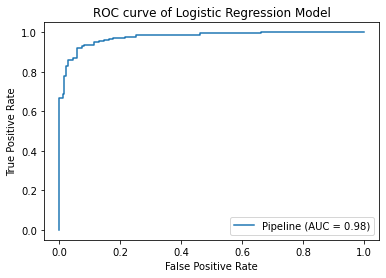

In [83]:
model_evaluation('Logistic Regression', lr_tfidf)

### Naive Bayes

Performance metrics for Naive Bayes: 
------------------------------------------------
train score : 0.985
Accuracy    : 0.935, Misclassification : 0.065
sensitivity : 0.941, specificity       : 0.93
------------------------------------------------


,Predict ColdCases,Predict Unrslvd Mystery
True ColdCases,173,13
True Unrslvd Mystery,11,174


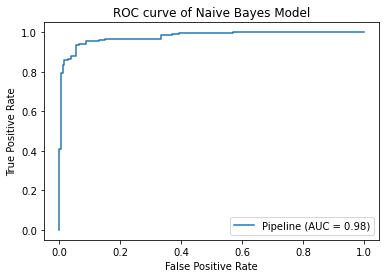

In [63]:
model_evaluation('Naive Bayes', nb_tfidf)

### Random Forest

Performance metrics for Random Forest Classifier: 
------------------------------------------------
train score : 1.0
Accuracy    : 0.968, Misclassification : 0.032
sensitivity : 0.946, specificity       : 0.989
------------------------------------------------


,Predict ColdCases,Predict Unrslvd Mystery
True ColdCases,184,2
True Unrslvd Mystery,10,175


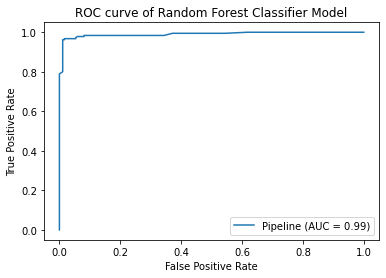

In [64]:
model_evaluation('Random Forest Classifier', rfc)

>Let's compare our model performance:
- Accuracy: 
    - All three models significantly out performs our baseline model. Recall that our baseline model is to predict the dominant class (Unresolved Mysteries) and we have probability of success of 0.51. Random Forest gives us the highest accuracy score of 0.957 which makes it the best model.  
    - Random forest classifier gives us the best performance in both training score and test score. A train score of 1.0 also indicates that the our Logistic Regression model is completely overfitted to our training data. 
- Confusion Matrix:
    - Sensitivity scores are the same for Logistic Regression and Naive Bayes and both are higher than that of Random Forest. This means that Logistic Regression and Naive Bayes performs marginally better in correctly identifying the positive class (Unresolved Mysteries).  
    - Specificity score for Random Forest is the highest and this is evident that it is able to better identify Cold Cases subreddit posts than other models.  
- AUC Score: 
    - All three models have very high AUC scores further proves our predictions to be highly accurate. 

## Mis-Classification Analysis

Here we shall examine the posts which are actually from Unresolved Mysteries but are wrongly classified as Cold Cases. 

In [65]:
preds = rfc.predict(X_test)

In [66]:
rfc_df = pd.DataFrame(y_test)

Adding the true and predicted label to our data frame for later analysis

In [67]:
rfc_df['predicted'] = preds
rfc_df['text'] = X_test

Adding the original text to data frame as comparison to tokenized clean data

In [68]:
rfc_df['original'] = all_posts2[all_posts2.index.isin(list(rfc_df.index))]['text_feature']

In [69]:
rfc_df

,subreddit,predicted,text,original
1184,0,0,best award nomin vote r coldcas rule detail amp nbsp must nomin someon seriou entri post repli top level comment categori nomin nomin mani post categori wish top level comment remov may upvot submiss nomin someon els top level comment repli top level comment categori nomin nomin mani post categori wish top level comment remov amp nbsp nomin mani post comment want rest commun vote nomin vote select also think deserv recognit contest mode vote hidden need downvot anyth upvot nomin agre thank particip sub year good luck januari admin deposit coin use distribut platinum winner amp nbsp amp nbsp amp nbsp award categori amp nbsp best discuss comment section best comment discuss year nomin user respons submit post best write best post year type post multipl winner categori best comment someon manag chang mind comment captur word better could multipl winner categori interest realli pull made scratch head post realli captur imagin ignit interest commun choic open categori commun nomin post ...,"Best of 2019 Awards Nomination and Voting Thread for r/coldcases! # Rules and Details\n\n&amp;nbsp;\n\n1. You must nominate someone other than yourself.\n\n2. Serious entries only.\n\n3. Only posts from 2019.\n\n4. Reply to the top level comment for each category to nominate. Nominate as many posts in each category as you wish. All other top level comments will be removed.\n\n5. You may upvote your own submissions if they have been nominated by someone else.\n\n6. There will only by 5 TOP LEVEL COMMENTS in this thread. Reply to the top level comment for each category to nominate. Nominate as many posts in each category as you wish. All other top level comments will be removed.\n\n&amp;nbsp;\n\nYou can nominate as many posts/comments as you want (that are not your own). The rest of the community then votes on those nominations by up voting selections they also think deserve recognition. The thread will be in contest mode with votes hidden. You don't need to downvote anything, only u..."
995,0,0,jane doe north yorkshir almost year almost year ago caller alert polic decompos bodi among willow herb north yorkshir countrysid abruptli hang reason nation secur ask name address bodi locat describ complet uncloth unidentifi gain notorieti nude nettl full write up part part ii bodi estim two year clue nearbi yoghurt top beneath bodi date bra even gown pant found mile bodi long afterward could link deceas polic believ woman kill dump countrysid still lack evid determin caus death mean mere label suspici even today analysi bodi reveal detail woman mother malform spine die spite extens effort trace caller never locat identifi appeal made nation intern discov woman ident fruitless shelv earli theori escap prison miss secretari hull reveal incorrect north yorkshir polic team success manag extract full dna profil woman believ locat children compar howev profil match woman dna ad nation databas yet new match ever crop polic yet given hunt answer howev hope new forens techniqu well target...,"Jane Doe, North Yorkshire, Unsolved for almost 40 years Almost 40 years ago - in 1981 - a caller alerted police to a ""decomposed"" body among some willow herbs in the North Yorkshire countryside, abruptly hanging up for ""reasons of national security"" when asked for his name and address. The body was in the location described, completely unclothed and unidentifiable, and the case gained notoriety as ""The Nude in the Nettles"" case. Full write-ups of the case in part I [here](https://www.yorkshirepost.co.uk/interactive/nude-in-the-nettles-I) and part II [here.](https://www.yorkshirepost.co.uk/interactive/nude-in-the-nettles-II)\n\nThe body had been there for an estimated two years, and the only clue nearby was a yoghurt top beneath the body, dated 1979. A bra, evening gown and pants were found about a mile from the body not long afterwards but they could not be linked to the deceased.\n\nPolice believe that the woman was killed a

Filter out only the wrongly classified data points

In [70]:
wrongly_classified = rfc_df[(rfc_df['subreddit']==1) & (rfc_df['subreddit']!=rfc_df['predicted'])]

In [71]:
wrongly_classified[['text', 'original']].sort_index()

,text,original
64,disappear tyler stice much inform yet tyler tyler stice year old young man live kingman arizona like mani boy age avid gamer comput enthusiast tyler introvert kid prefer compani comput social group peopl one thing brought tyler room job local furnish compani black ford mustang big plan start attend flagstaff univers soon could transfer local commun colleg monday june tyler skip work charact mom said told need time tuesday june tyler leav work like normal around later afternoon tyler boss call mom tyler never show work everyon look tyler phone go right voicemail one heard polic tell famili wait least hour report miss saturday june tyler car found hualapai mountain road local mountian hike area belong miss wallet key laptop etc mani item still car camera took everywher empti laptop bag polic search area dog brought search dog follow scent wood girl scout camp back road sign tyler found month tyler went miss tyler sister jessica said someon log facebook account read messag repli given...,"The Unsolved Disappearance of Tyler Stice So much information on this case- and yet, no Tyler.\n\nIn 2016, Tyler Stice was a 20 year old young man living in Kingman, Arizona. Like many boys his age, he was avid gamer and computer enthusiast. Tyler was an introvert, and a kid who preferred the company of his computer over socializing with groups of people. One of the few things that brought Tyler out of his room was his job at a local furnishings company, and his black ford mustang. He had big plans to start attending Flagstaff University as soon as he could transfer from the local community college.\n\nOn Monday June 20, 2016 Tyler skipped work. This was out of character for him, but his mom said he told her he just 'needed some time'.\n\nOn Tuesday June 21, 2016 Tyler leaves for work like normal around 5:30am. Later that afternoon Tyler's boss calls his Mom as Tyler never showed up for work. Everyone looks for Tyler, but his phone is going right to voicemail and no one has heard..."
139,matthew john owen year old iowa pimp murder cedar rapid home pimp sugar daddi matthew john owen went name john owen found dead kitchen floor home cedar rapid friday morn januari polic discov year old bodi neighbor call report owen front door open accord chief state medic examin dr julia goodin owen die multipl blunt forc injuri owen live alon resid washington counti prior move cedar rapid purchas quarter million dollar hous across kirkwood commun colleg two month murder accord gazett articl date jan gazett also report time owen move day death polic made seven visit hous offic investig report two burglari two theft suspici person also made two welfar check accord report publish feb gazett jeff raasch owen often brag financ known wear ten thousand dollar worth jewelri hand even boast spend oxygen machin kept aliv want feel like hugh hefner year old former stripper told gazett want love go young women owen marri third wife ruth year marriag file divorc may ruth nurs home ruth die six ...,"Matthew John Owen. 90 year old Iowa Pimp murdered in Cedar Rapids Home in 2013. \nNOT A PIMP *SUGAR DADDY*\n\nMatthew John Owen, who went by the name M. John Owen, was found dead on the kitchen floor of his home in Cedar Rapids on Friday morning, January 18, 2013.\n\nPolice discovered the 90-year-old’s body after a neighbor called to report Owen’s front door open.\n\nAccording to Chief State Medical Examiner Dr. Julia Goodin, Owen died of multiple blunt-force injuries\n\nOwen, who lived alone, had resided in Washington County prior to moving to Cedar Rapids and had purchased the quarter-million dollar house across from Kirkwood Community College just two months before his murder, according to a Gazette article dated Jan. 30, 2013.\n\nThe Gazette also reported that between the time Owen moved in and the day of his death, police made seven visits to the house; officers investigated reports of two burglaries, two thefts, a suspicious person, and also made two welfar

>After reading the wrongly classified posts, one can easily tell that these posts are not strictly unresolved mysteries but rather cold cases related to missing people and other criminal cases. Therefore, our model is not entirely wrong in classifying them under Cold Cases. We shall have a word count on the top words to see whether these top words gives misleading messages to our model. 

In [72]:
# top 100 predictive words in both subreddits
keywords = coeff_rfc.head(100).index

In [73]:
# let's do a wordcount on the appearance of top 100 predictive words in the wrongly classified posts
kw_in_false_neg_class={}
for i in range(len(wrongly_classified.index)):
    kw_in_false_neg_class[i]=[y for y in wrongly_classified.iloc[i]['text'].split() if y in keywords]

In [74]:
kw_in_false_neg_class_df = pd.DataFrame(index=kw_in_false_neg_class.keys())

In [75]:
kw_in_false_neg_class_df['words'] = kw_in_false_neg_class.values()

In [76]:
kw_in_false_neg_class_df

,words
0,"[case, articl, link, case, list]"
1,"[way, mani, get, new, use, new, life, way, way, sinc, way]"
2,"[name, found, bodi, articl, also, time, person, also, known, wear, may, later, final, follow, without, world, would, world, one, use, said, said, involv, said, sever, said, said, sourc, use, known, name, one, found, said, man, found, said, involv]"
3,"[man, mani, peopl, one, thing, said, time, around, later, never, one, found, mani, still, took, search, search, follow, found, sister, said, read, never, happen, anyth, anoth, interest, note, said, involv, search, mani, time, also, sister, mother, would, sister, mani, search, amp, never, sister, would, run, amp]"
4,"[link, last, may, may, around, anyon, get, bodi, time, would]"
5,"[new, man, new, man, link, also, time, may, last, found, sinc]"
6,"[case, post, peopl, case, one, found, never, get, get, one, peopl, happen, sister]"
7,"[case, case, case, case, case, person, one, would, anoth, one, found, one, would, case, case, get]"
8,"[search, never, found, bodi, may, mother]"
9,"[man, mani, peopl, one, thing, said, time, around, later, never, one, found, mani, still, took, search, search, follow, found, sister, said, read, never, happen, anyth, anoth, interest, note, said, involv, search, mani, time, also, sister, mother, would, sister, mani, search, amp, never, sister, would, run, amp]"


In [77]:
for i in range(len(kw_in_false_neg_class_df.index)):
    words_only = []
    for y in kw_in_false_neg_class_df.iloc[i]['words']:
        words_only.append(y)
words_only = set(words_only)

In [78]:
words_only

{'also',
 'amp',
 'anoth',
 'anyth',
 'around',
 'follow',
 'found',
 'happen',
 'interest',
 'involv',
 'later',
 'man',
 'mani',
 'mother',
 'never',
 'note',
 'one',
 'peopl',
 'read',
 'run',
 'said',
 'search',
 'sister',
 'still',
 'thing',
 'time',
 'took',
 'would'}

>It is evident that these Unresolved Mysteries posts contains top predictive words from Cold Cases such as:
- 'found', 'time', 'amp', 'also', 'polic', 'one', 'disappear', 'would', 'like', 'note' 

>This might be the reason causing the wrong classification of these posts. 

## Conclusion

**Recommendations**:
- All three models performs reasonably well on both train and unseen data. An accuracy score of 0.957 indicates that Random Forest Classifier is the clear winner for this task. It is capable of classifying almost all the posts. Having the lowest misclassification score of 0.043 also further proves that it is the best model of all the built ones. 
- This model can be used to 
    - Classify subreddit posts which accidentally lost their labels
    - Move posts to the correct subreddit
    - Automatically suggest the correct subreddit label to writers to improve tagging accuracy
- All of the above stated point will improve reader experience and increase the click through rate of writer's posts.

**Limitations**:
- Unresolved Mystery being a much more popular subreddit than the cold cases provides us with more training text for our model to learn and improve its performance. Therefore, accuracy in predicting Unresolved Mystery will be better than that in predicting Cold Cases.  
- Nature and type of mysteries and cases are changing with time. Therefore, vocabulary features in this model needs to be constantly re-trained and updated to classify labels correctly. 
- Although this model performs reasonably well, we could try other classification methods such as Support Vector Machines. Furthermore, this model's performance is limited to two subreddit labels only and shall be tested with posts from more than two subreddits to evaluate its performance. 